In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
from matplotlib import style

In [2]:
learning_rates = [0.0001,0.0002,0.0003,0.0004,0.0005]

In [3]:
def mod(x):
    if x<0:
        return -x
    else:
        return x

In [4]:
class SingleLayerPerceptron():
  
  def __init__(self, inputs, learning_rate):
    self.weights = np.random.default_rng().uniform(low=-0.3, high=0.3, size=(inputs+1, 1))
    self.lr = learning_rate

  def activation_func(self, thresold):
    value = thresold
    value[value > 0] = 1
    value[value < 0] = 0
    return value

  def add_bias(self, x_data):
    m = x_data.shape[0]
    return np.c_[np.ones(m), x_data]

  def predict_output(self, x_data):
    thresold = x_data @ self.weights
    return self.activation_func(thresold)

  def epoch(self, X, y):
    error = 0
    for i in range(X.shape[0]):
      delt = y[i] - self.predict_output(X[i])
      delt = delt.item()
      x = np.reshape(X[i], newshape=(-1, 1))
      self.weights = self.weights + self.lr * delt * x
      error += mod(delt)
    return error / X.shape[0] 

  def fit(self, x_data, y):
    x_data = self.set_shape(x_data)
    x_data = self.add_bias(x_data)
    y = self.set_shape(y)

    accurancys = list()

    for i in range(20000):
      error = self.epoch(x_data, y)
      accurancy = 1-error
      accurancys.append(accurancy)

    return accurancys

  def set_shape(self, array):
    array = np.asarray(array)
    if array.ndim == 1:
      return np.reshape(array, newshape=(-1, 1))
    elif array.ndim == 2:
      return array
    else:
      raise Exception("error occured in set shape function ...")

In [5]:
def plot_graph(epochs,type):
    figure = plt.figure(figsize=(40, 10))
    axs = dict()

    for i in range(0, 5):
        x_data = epochs["x_data"]
        output = epochs["output"][i]
        style.use('seaborn')
        plt.plot(x_data,output,label = 'epochs vs accurancy line',color='red',linewidth=3)
        plt.title(f"SingleLayerPerceptron for {type} with Learning Rate {epochs['learning_rate'][i]}")
        plt.xlabel('Epoch')
        plt.ylabel('accurancy')
        plt.show()

#### SLP  for AND Gate

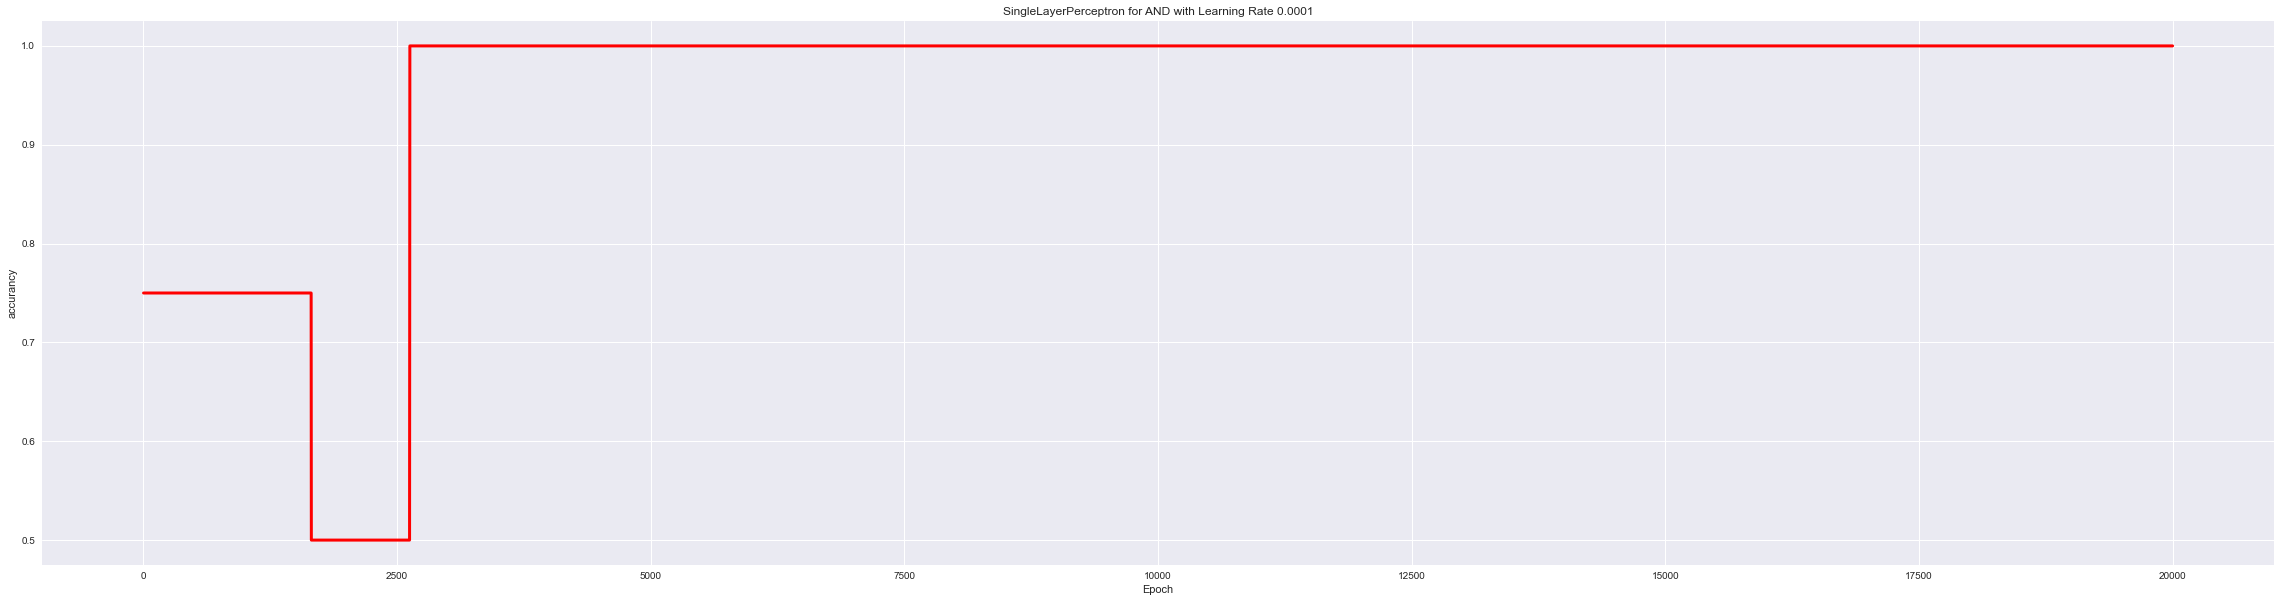

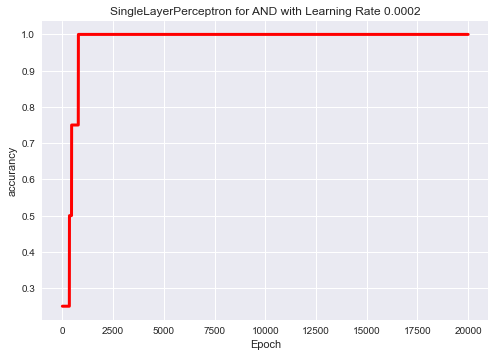

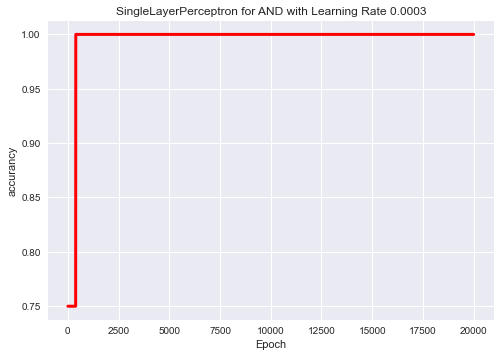

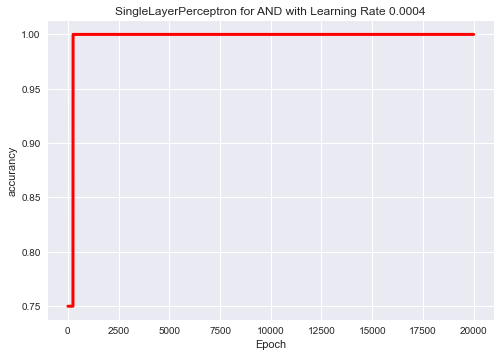

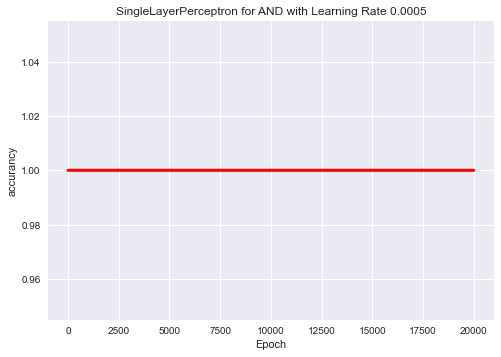

In [6]:
x_data = [[0, 0], [1,0], [0, 1], [1, 1]]
y = [0,0,0,1]

epochs = {'learning_rate':learning_rates,'x_data':[i for i in range(1,20001)],'output':list()}

for learning_rate in learning_rates:
    and_model = SingleLayerPerceptron(inputs = 2,learning_rate = learning_rate)
    model = and_model.fit(x_data=x_data,y=y)
    epochs["output"].append(model)

plot_graph(epochs,"AND")
    

#### SLP for OR Gate

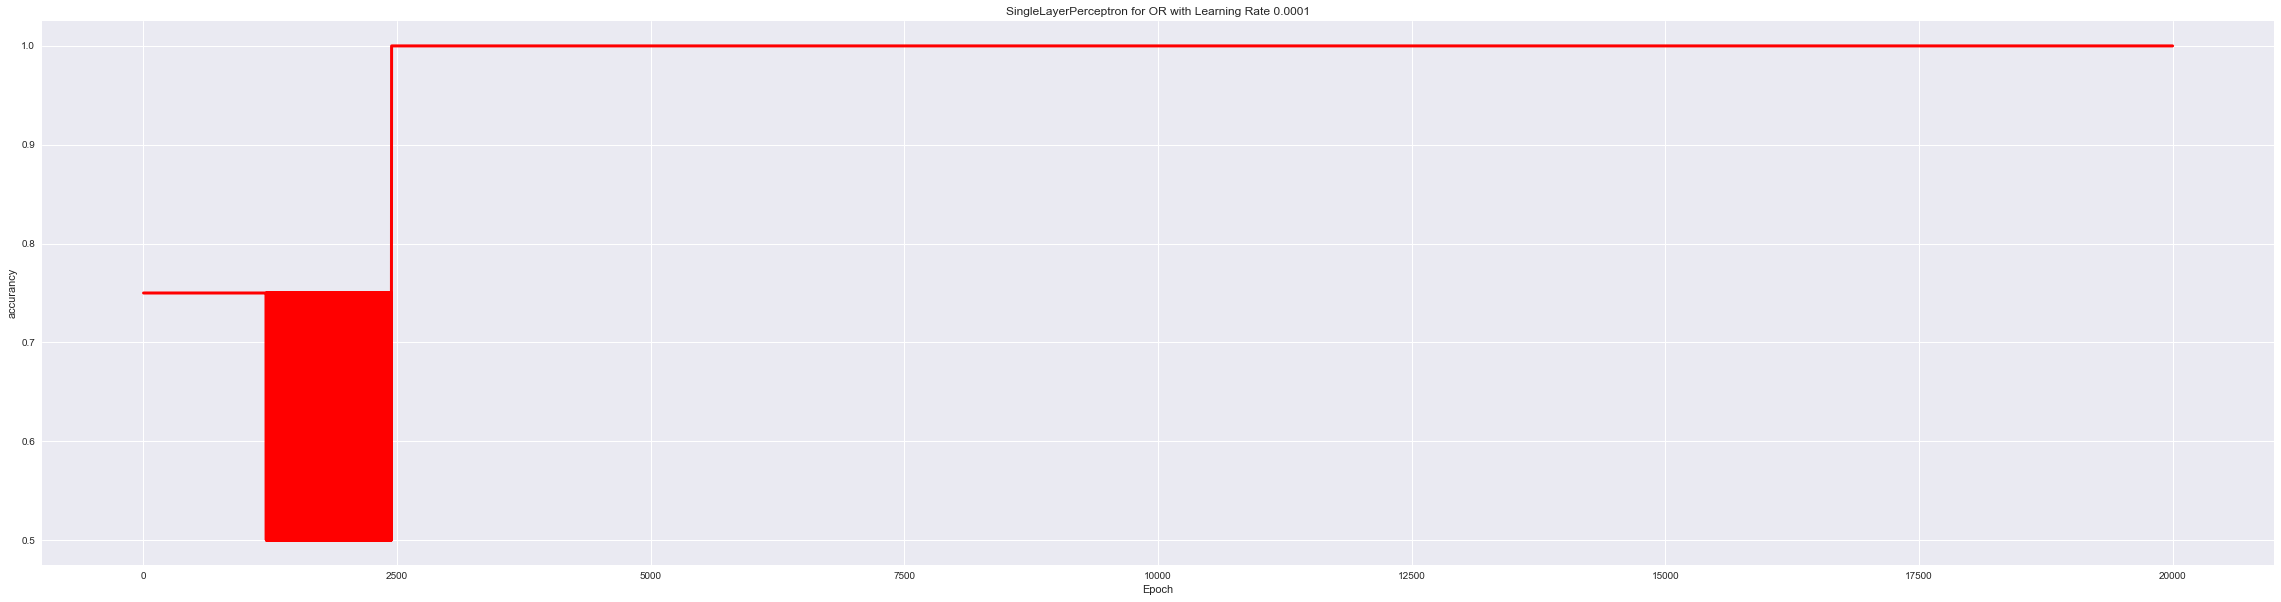

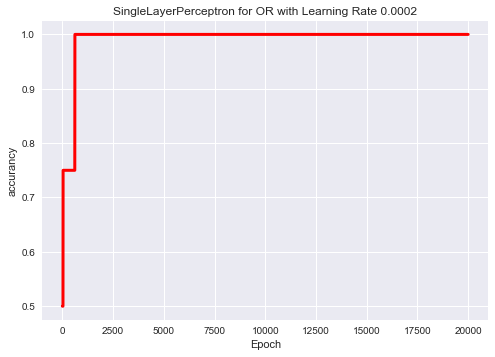

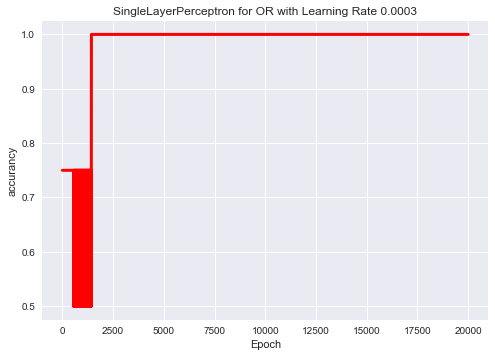

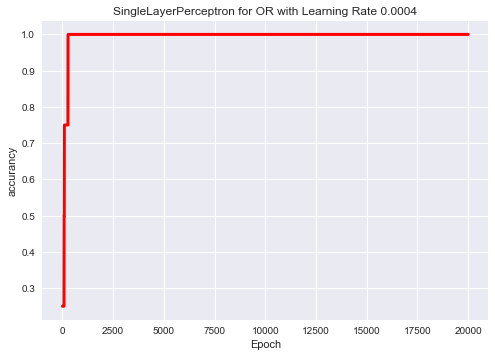

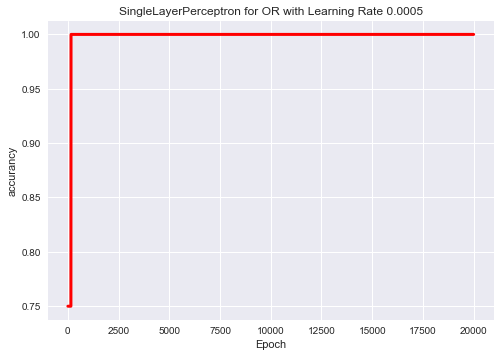

In [7]:
x_data = [[0, 0], [1,0], [0, 1], [1, 1]]
y = [0,1,1,1]

epochs = {'learning_rate':learning_rates,'x_data':[i for i in range(1,20001)],'output':list()}

for learning_rate in learning_rates:
    and_model = SingleLayerPerceptron(inputs = 2,learning_rate = learning_rate)
    model = and_model.fit(x_data=x_data,y=y)
    epochs["output"].append(model)

plot_graph(epochs,"OR")
    